In [1]:
from google.colab import files
f = files.upload()

Saving 담배판매량_데이터셋_전처리전.xlsx to 담배판매량_데이터셋_전처리전.xlsx


In [4]:
import openpyxl

wb = openpyxl.load_workbook('/content/담배판매량_데이터셋_전처리전.xlsx')

In [5]:
'''
14, 15, 16 ,17, 18, 19, 20 -> Q2, Q3, Q4, Q6, Q9, Q12, Q17  : 궐련형
17, 18, 19 20 -> Q7, Q10, (Q13+Q14+Q15), (Q18+Q19+Q20) : 전자 담배

'''
sheet = wb['Sheet1']

#general_14 = int(sheet['Q2'].value)
general_15 = int(sheet['Q3'].value)
general_16 = int(sheet['Q4'].value)
general_17 = int(sheet['Q6'].value)
general_18 = int(sheet['Q9'].value)
general_19 = int(sheet['Q12'].value)
#general_20 = int(sheet['Q17'].value)

#elec_14 = 0
elec_15 = 0
elec_16 = 0
elec_17 = int(sheet['Q7'].value)
elec_18 = int(sheet['Q10'].value)
elec_19 = int(sheet['Q13'].value)+int(sheet['Q14'].value)+int(sheet['Q15'].value)
#elec_20 = int(sheet['Q18'].value)+int(sheet['Q19'].value)+int(sheet['Q20'].value)



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

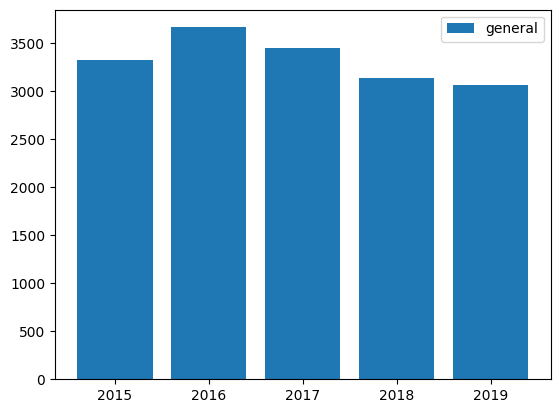

판매량 변화율 :  -0.08 %


In [6]:
import matplotlib.pyplot as plt
import numpy as np

year = ['2015', '2016', '2017', '2018', '2019']
general = [general_15,general_16, general_17, general_18, general_19]

plt.bar(year,general, label='general')
plt.legend()
plt.show()

# 판매 변화율
general_sales = float((general_19-general_15)/general_15)

print("판매량 변화율 : ",round(general_sales,2),"%")

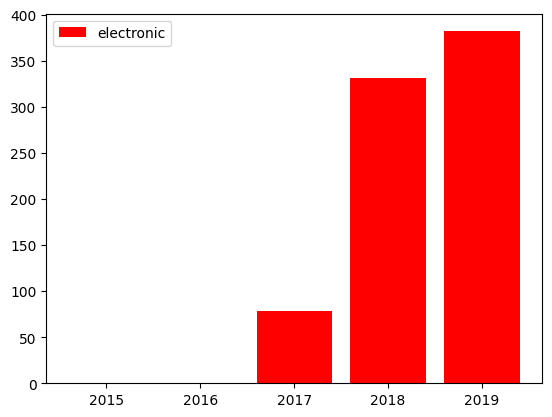

출시 대비 판매량 변화율 :  3.9 %


In [7]:
import matplotlib.pyplot as plt
import numpy as np

year = ['2015', '2016', '2017', '2018', '2019']
elec = [elec_15, elec_16, elec_17, elec_18, elec_19]

plt.bar(year,elec, label='electronic', color='red')
plt.legend()
plt.show()

# 출시 대비 판매량 변화율
elec_sales = float((elec_19-elec_17)/elec_17)

print("출시 대비 판매량 변화율 : ",round(elec_sales,2),"%")

In [8]:
import pandas as pd

general_all = general_15+general_16+general_17+general_18+general_19
elec_all = elec_15+elec_16+elec_17+elec_18+elec_19

general_15_p = round(float(general_15/general_all),2)
general_16_p = round(float(general_16/general_all),2)
general_17_p = round(float(general_17/general_all),2)
general_18_p = round(float(general_18/general_all),2)
general_19_p = round(float(general_19/general_all),2)

elec_15_p = round(float(elec_15/elec_all),2)
elec_16_p = round(float(elec_16/elec_all),2)
elec_17_p = round(float(elec_17/elec_all),2)
elec_18_p = round(float(elec_18/elec_all),2)
elec_19_p = round(float(elec_19/elec_all),2)


list1 = list([[general_15_p, general_16_p, general_17_p, general_18_p, general_19_p],
              [elec_15, elec_16, elec_17_p, elec_18_p, elec_19_p]])

df = pd.DataFrame(list1, columns=['2015','2016','2017','2018','2019'])

df.index = ['general','electronic']

df

,2015,2016,2017,2018,2019
general,0.2,0.22,0.21,0.19,0.18
electronic,0.0,0.00,0.10,0.42,0.48


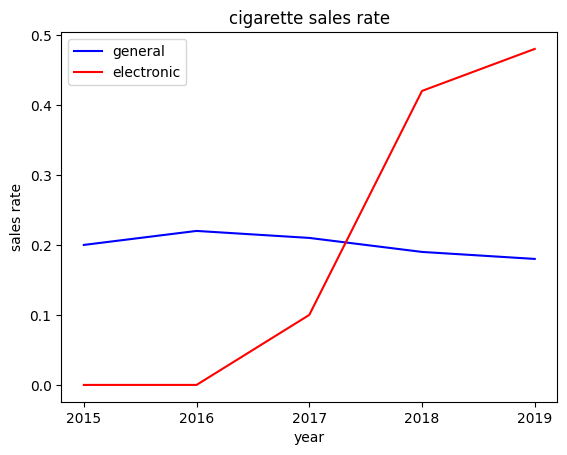

In [9]:
import matplotlib.pyplot as plt

year = ['2015', '2016', '2017', '2018', '2019']

plt.title('cigarette sales rate')
plt.plot(year, [general_15_p, general_16_p, general_17_p, general_18_p, general_19_p],label='general',color='blue')
plt.plot(year,[elec_15, elec_16, elec_17_p, elec_18_p, elec_19_p],label='electronic', color='red')
plt.xlabel('year')
plt.ylabel('sales rate')
plt.legend()
plt.show()

In [10]:
# Change the data to a two-dimensional array
data = [[general_15, elec_15], [general_16, elec_16], [general_17, elec_17], [general_18, elec_18], [general_19, elec_19]]
# Create the DataFrame
df = pd.DataFrame(data, columns=['general','electronic'])

# Set the index
df.index = ['2015','2016','2017','2018','2019']

df

,general,electronic
2015,3326,0
2016,3663,0
2017,3444,78
2018,3139,331
2019,3063,382


In [11]:
# 정규화
df1 =df.copy()

df1['general_minmax'] = (df1['general'] - df1['general'].min()) / (df1['general'].max( ) - df1['general'].min( ))
df1['electronic_minmax'] = (df1['electronic'] - df1['electronic'].min( )) / (df1['electronic'].max( ) - df1['electronic'].min( ))

df1

,general,electronic,general_minmax,electronic_minmax
2015,3326,0,0.438333,0.000000
2016,3663,0,1.000000,0.000000
2017,3444,78,0.635000,0.204188
2018,3139,331,0.126667,0.866492
2019,3063,382,0.000000,1.000000


In [12]:
import openpyxl

wb = openpyxl.Workbook()
sheet = wb.active

for row in df1.itertuples():
    sheet.append(row)

wb.save('담배판매량_데이터셋_전처리후.xlsx')

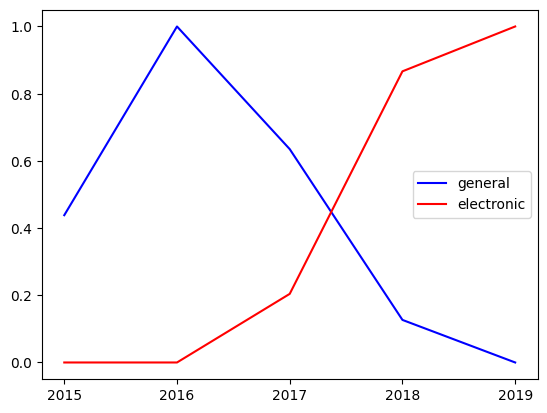

In [13]:
import matplotlib.pyplot as plt

plt.plot(df1['general_minmax'], label='general',color='blue')
plt.plot(df1['electronic_minmax'], label='electronic',color='red')
plt.legend()
plt.show()

---
# **상관관계 분석**

In [ ]:
import pandas as pd

# 일반 담배의 판매량과 전자 담배의 판매량을 연도별로 묶어서 저장
data = [[general_15, elec_15], [general_16, elec_16], [general_17, elec_17], [general_18, elec_18], [general_19, elec_19]]

# 데이터 프레임화
df = pd.DataFrame(data, columns=['general','electronic'])

# 인덱스는 연도로 설정
df.index = ['2015','2016','2017','2018','2019']

df1 = df.copy()

# 분석을 위해 앞서 전처리과정을 통해 얻은 정규화된 폐암 발생자 수를 데이터 프레임에 추가
normalized_lung_cancer = [0.000000, 0.278853, 0.500000, 0.762545, 1.000000]
df1['정규화된 폐암 발생자수'] = normalized_lung_cancer

print(df1)

      general  electronic  정규화된 폐암 발생자수
2015     3326           0      0.000000
2016     3663           0      0.278853
2017     3444          78      0.500000
2018     3139         331      0.762545
2019     3063         382      1.000000


In [ ]:
cancer = [24791, 26347, 27581, 29046, 30371]
df['폐암 발생자수'] = cancer

print(df)

      general  electronic  폐암 발생자수
2015     3326           0    24791
2016     3663           0    26347
2017     3444          78    27581
2018     3139         331    29046
2019     3063         382    30371


In [ ]:
# 피어슨 상관계수
pearson_corr_electronic = df1['electronic_minmax'].corr(df1['정규화된 폐암 발생자수'], method='pearson')
pearson_corr_general = df1['general_minmax'].corr(df1['정규화된 폐암 발생자수'], method='pearson')

# 스피어만 상관계수
spearman_corr_electronic = df1['electronic_minmax'].corr(df1['정규화된 폐암 발생자수'], method='spearman')
spearman_corr_general = df1['general_minmax'].corr(df1['정규화된 폐암 발생자수'], method='spearman')

# 켄달 상관계수
kendall_corr_electronic = df1['electronic_minmax'].corr(df1['정규화된 폐암 발생자수'], method='kendall')
kendall_corr_general = df1['general_minmax'].corr(df1['정규화된 폐암 발생자수'], method='kendall')

print(f"폐암 발생자수와 전자담배 피어슨 상관계수: {pearson_corr_electronic}")
print(f"폐암 발생자수와 전자담배 스피어만 상관계수: {spearman_corr_electronic}")
print(f"폐암 발생자수와 전자담배 켄달 상관계수: {kendall_corr_electronic}")

print(f"폐암 발생자수와 일반담배 피어슨 상관계수: {pearson_corr_general}")
print(f"폐암 발생자수와 일반담배 스피어만 상관계수: {spearman_corr_general}")
print(f"폐암 발생자수와 일반담배 켄달 상관계수: {kendall_corr_general}")




In [ ]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

x = df1[['general_minmax', 'electronic_minmax']]
y = df1['정규화된 폐암 발생자수']

fit = ols('y ~ x', data=df1).fit( )
print(fit.summary( ))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     17.81
Date:                Mon, 27 May 2024   Prob (F-statistic):             0.0532
Time:                        05:14:00   Log-Likelihood:                 5.4701
No. Observations:                   5   AIC:                            -4.940
Df Residuals:                       2   BIC:                            -6.112
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1963      0.249     -0.790      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

x = df1[['general_minmax', 'electronic_minmax']]
y = df1['정규화된 폐암 발생자수']

x = sm.add_constant(x)

fit = ols('y ~ x', data=df1).fit( )
print(fit.summary( ))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     17.81
Date:                Mon, 27 May 2024   Prob (F-statistic):             0.0532
Time:                        05:15:47   Log-Likelihood:                 5.4701
No. Observations:                   5   AIC:                            -4.940
Df Residuals:                       2   BIC:                            -6.112
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0982      0.124     -0.790      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

x = df1[['general_minmax', 'electronic_minmax']]
y = df1['정규화된 폐암 발생자수']

fit = sm.Logit(y, x).fit()
print(fit.summary( ))

Optimization terminated successfully.
         Current function value: 0.382622
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           정규화된 폐암 발생자수   No. Observations:                    5
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 May 2024   Pseudo R-squ.:                  0.4478
Time:                        05:21:47   Log-Likelihood:                -1.9131
converged:                       True   LL-Null:                       -3.4643
Covariance Type:            nonrobust   LLR p-value:                   0.07817
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_minmax       -1.4935      1.891     -0.790      0.430      -5.201       2.214
electron

---
---

In [ ]:
pearson_corr_electronic = df['electronic'].corr(df['폐암 발생자수'], method='pearson')
pearson_corr_general = df['general'].corr(df['폐암 발생자수'], method='pearson')

spearman_corr_electronic = df['electronic'].corr(df['폐암 발생자수'], method='spearman')
spearman_corr_general = df['general'].corr(df['폐암 발생자수'], method='spearman')

kendall_corr_electronic = df['electronic'].corr(df['폐암 발생자수'], method='kendall')
kendall_corr_general = df['general'].corr(df['폐암 발생자수'], method='kendall')

print(f"폐암 발생자수와 전자담배 피어슨 상관계수: {pearson_corr_electronic}")
print(f"폐암 발생자수와 전자담배 스피어만 상관계수: {spearman_corr_electronic}")
print(f"폐암 발생자수와 전자담배 켄달 상관계수: {kendall_corr_electronic}")
print('\n')
print(f"폐암 발생자수와 일반담배 피어슨 상관계수: {pearson_corr_general}")
print(f"폐암 발생자수와 일반담배 스피어만 상관계수: {spearman_corr_general}")
print(f"폐암 발생자수와 일반담배 켄달 상관계수: {kendall_corr_general}")


폐암 발생자수와 전자담배 피어슨 상관계수: 0.9348878566130829
폐암 발생자수와 전자담배 스피어만 상관계수: 0.9746794344808963
폐암 발생자수와 전자담배 켄달 상관계수: 0.9486832980505138


폐암 발생자수와 일반담배 피어슨 상관계수: -0.6746979486673654
폐암 발생자수와 일반담배 스피어만 상관계수: -0.7
폐암 발생자수와 일반담배 켄달 상관계수: -0.6


In [ ]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

x = df[['general', 'electronic']]
y = df['폐암 발생자수']

fit = ols('y ~ x', data=df).fit( )
print(fit.summary( ))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     17.81
Date:                Mon, 27 May 2024   Prob (F-statistic):             0.0532
Time:                        05:29:53   Log-Likelihood:                -37.665
No. Observations:                   5   AIC:                             81.33
Df Residuals:                       2   BIC:                             80.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8634.6744   1.04e+04      0.828      0.4

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

x = df1[['general_minmax', 'electronic_minmax']]
y = df1['정규화된 폐암 발생자수']

x = sm.add_constant(x)

fit = ols('y ~ x', data=df1).fit( )
print(fit.summary( ))

In [ ]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

x = df[['general', 'electronic']]
y = df1['정규화된 폐암 발생자수']

fit = sm.Logit(y, x).fit()
print(fit.summary( ))

Optimization terminated successfully.
         Current function value: 0.344488
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           정규화된 폐암 발생자수   No. Observations:                    5
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 May 2024   Pseudo R-squ.:                  0.5028
Time:                        05:31:36   Log-Likelihood:                -1.7224
converged:                       True   LL-Null:                       -3.4643
Covariance Type:            nonrobust   LLR p-value:                   0.06197
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
general       -0.0004      0.000     -0.940      0.347      -0.001       0.000
electronic     0.0099      0.